In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from scipy.integrate import quad
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.pairwise import rbf_kernel
from numpy import average as avg

In [2]:
X = pd.read_csv("population_X.csv").to_numpy()
Y = pd.read_csv("population_Y.csv").to_numpy()
Z = pd.read_csv("population_Z.csv").to_numpy()
Q = pd.read_csv("population_Q.csv").to_numpy()

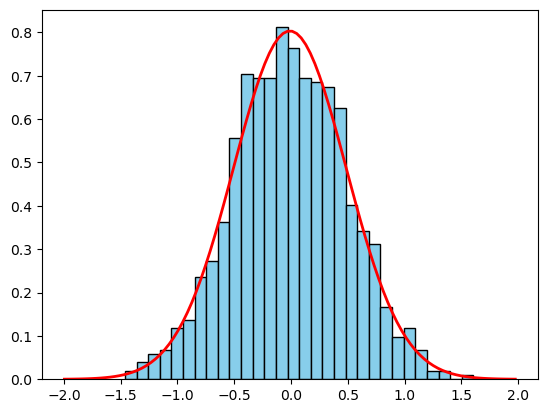

In [3]:
import matplotlib.pyplot as plt

# Plot histogram for X
# SAT Data Histogram
plt.hist(X, bins=30, density=True, color='skyblue', edgecolor='black')
sigma = np.std(X)
mu = np.mean(X)
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
# GAUSSION DISTRIBUTION
p_x =  1 / (sigma * np.sqrt(2 * math.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x,p_x,color='red',linewidth=2)
plt.show()


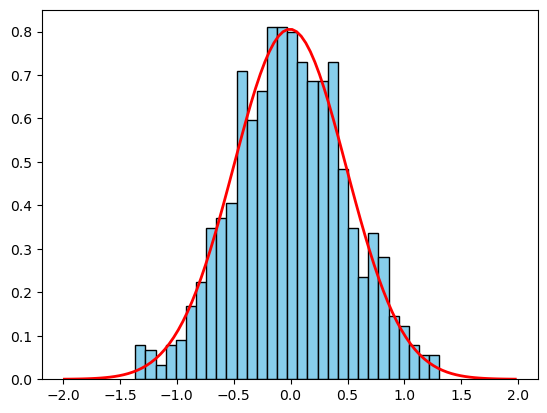

In [4]:
# Plot histogram for Y
plt.hist(Y, bins=30, density=True, color='skyblue', edgecolor='black')
sigma = np.std(Y)
mu = np.mean(Y)
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
# GAUSSION DISTRIBUTION
p_y =  1 / (sigma * np.sqrt(2 * math.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x,p_y,color='red',linewidth=2)
plt.show()

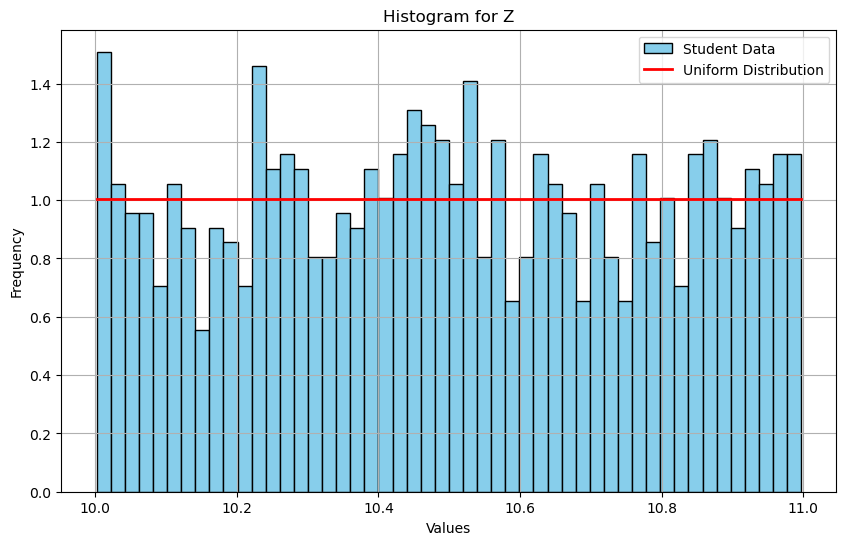

In [5]:
# Plot Z
a = np.min(Z)
b = np.max(Z)

# UNIFORM DISTRIBUTION
x = np.linspace(a, b, 1000)
y = 1 / (b - a)
plt.figure(figsize=(10, 6))

# Plot histogram for Z
plt.hist(Z, bins=50, density=True, color='skyblue', edgecolor='black', label='Student Data')

# Plot uniform distribution line
plt.plot(x, np.full_like(x, y), color='red', linewidth=2, label='Uniform Distribution')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram for Z')
plt.grid(True)
plt.legend()
plt.show()


## 2) Which population (Y or Z) should we accept for blood donation?

Population Y since it has a distribution  most similar to X.

In [6]:
# KL Divergence using sampling
def KL_Divergence(p,q):
    sum = 0
    for i in range(len(p)):
        sum += p[i] * math.log(p[i]/q[i])
    return sum

d_1 = KL_Divergence(p_x,p_y)
d_2 = KL_Divergence(p_x, np.full_like(x, y))

In [7]:
# Numpy Automatic Integration Approach
def integrand_KLD_X_Y(x, mu1, sigma1, mu2, sigma2):
    p_x =  1 / (sigma1 * np.sqrt(2 * math.pi)) * np.exp(-(x - mu1)**2 / (2 * sigma1**2))
    p_y = 1 / (sigma2 * np.sqrt(2 * math.pi)) * np.exp(-(x - mu2)**2 / (2 * sigma2**2))
    return p_x * np.log(p_x / p_y)
# Perform the integration
result, error = quad(integrand_KLD_X_Y, -np.inf, np.inf, args=(np.mean(X), np.std(X), np.mean(Y), np.std(Y)))
print(result)

nan


/var/folders/xm/v8qzdms97jgglrj50ntk80hr0000gn/T/ipykernel_52937/1980043854.py:5: RuntimeWarning: invalid value encountered in scalar divide
  return p_x * np.log(p_x / p_y)
/var/folders/xm/v8qzdms97jgglrj50ntk80hr0000gn/T/ipykernel_52937/1980043854.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return p_x * np.log(p_x / p_y)
/var/folders/xm/v8qzdms97jgglrj50ntk80hr0000gn/T/ipykernel_52937/1980043854.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, error = quad(integrand_KLD_X_Y, -np.inf, np.inf, args=(np.mean(X), np.std(X), np.mean(Y), np.std(Y)))


In [14]:
def calculate_entropy(P):
    entropy = 0
    for p in P:
        entropy += p * math.log(p)
    return entropy

In [15]:
entropy_X = calculate_entropy(X)
entropy_Y = calculate_entropy(Y)
entropy_Z = calculate_entropy(Z)
entropy_Q = calculate_entropy(Q)

/var/folders/xm/v8qzdms97jgglrj50ntk80hr0000gn/T/ipykernel_52937/4049809537.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  entropy += p * math.log(p)


ValueError: math domain error

In [ ]:
# Numpy Automatic Integration Approach
def integrand_Entropy(x, mu1, sigma1, mu2, sigma2):
    p_x =  1 / (sigma1 * np.sqrt(2 * math.pi)) * np.exp(-(x - mu1)**2 / (2 * sigma1**2))
    p_y = 1 / (sigma2 * np.sqrt(2 * math.pi)) * np.exp(-(x - mu2)**2 / (2 * sigma2**2))
    return p_x * np.log(p_x / p_y)
# Perform the integration
result, error = quad(integrand_KLD_X_Y, -np.inf, np.inf, args=(np.mean(X), np.std(X), np.mean(Y), np.std(Y)))
print(result)